In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dbSp = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/CoronaVirus/SpaCovid-19.csv")

In [3]:
log = lambda x: math.log2(x)
deslog = lambda x: 2**x
ysp=dbSp["Y"]
ysp=ysp.apply(log)
Xsp=dbSp.drop('Y', axis=1)
Xsp=Xsp.applymap(log)
X_trainsp, X_testsp, y_trainsp, y_testsp = train_test_split(Xsp, ysp, test_size = 0.2, random_state = 0)
print("Training MLPRegressor...")
reg = MLPRegressor(hidden_layer_sizes =(6,12,6 ),solver='adam',activation = 'relu',learning_rate='adaptive',learning_rate_init = 0.1,max_iter=10000, shuffle = False)
for i in range (0,1):
    reg.fit(X_trainsp,y_trainsp)

Training MLPRegressor...


teste de overfiting
Mean squared error: 502399513.79
Variance score: 0.65


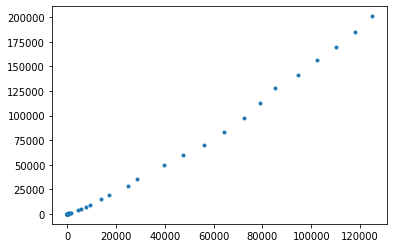

In [4]:
y_predict_trainsp = reg.predict(X_trainsp)
print("teste de overfiting")
y_trainsp= deslog(y_trainsp)
y_predict_trainsp= deslog(y_predict_trainsp)
print("Mean squared error: %.2f"
      % mean_squared_error(y_trainsp, y_predict_trainsp))
print('Variance score: %.2f' % r2_score(y_trainsp, y_predict_trainsp))
plt.scatter(y_trainsp,y_predict_trainsp,marker='.')
plt.show()

Resultados
Mean squared error: 8628790.31
Variance score: 0.92


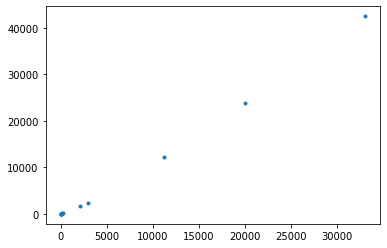

In [5]:
y_predictsp= reg.predict(X_testsp)
print("Resultados")
y_testsp= deslog(y_testsp)
y_predictsp= deslog(y_predictsp)
print("Mean squared error: %.2f"
      % mean_squared_error(y_testsp, y_predictsp))
print('Variance score: %.2f' % r2_score(y_testsp, y_predictsp))
plt.scatter(y_testsp,y_predictsp,marker='.')
plt.show()

In [6]:
dbBr = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/CoronaVirus/Covid-19.csv")
xBr = dbBr.drop('Y', axis=1)
xBr= xBr.applymap(log)
yBr = dbBr['Y']
yBr= yBr.apply(log)

Predição Brasil


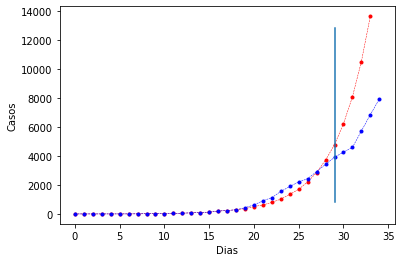

In [7]:
for i in range(0,15):
    linha = xBr.loc[(13+i)]
    Ypred = reg.predict([linha])
    xBr.at[(14+i),'cases6']=Ypred
    xBr.at[(15+i),'cases5']=Ypred
    xBr.at[(16+i),'cases4']=Ypred
    xBr.at[(17+i),'cases3']=Ypred
    xBr.at[(18+i),'cases2']=Ypred
    xBr.at[(19+i),'cases1']=Ypred
xBr = xBr.applymap(deslog)
lista1 = []
lista2 = []
for i in range(0,35):
    if(i<34):
        lista1.append(i)
    lista2.append(i)
CovidBr = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019//CoronaVirus/covid-19UmaColuna.csv")
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.plot(lista1,xBr['cases1'],linestyle='--', color='r', marker='.', linewidth=0.5)
plt.plot(lista2,CovidBr['cases'],linestyle='--', color='b', marker='.', linewidth=0.5)
plt.axvline(x=29, ymin=0.1, ymax=0.9) #inicio da quarentena no brasil
print("Predição Brasil")

Predição Espanha


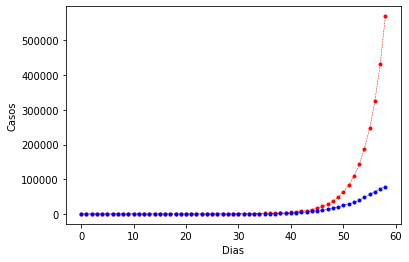

In [8]:
# prever dados da espanha
DadosSp=dbSp.drop('Y',axis=1)
DadosSp= DadosSp.loc[0:1]
DadosSp = DadosSp.applymap(log)
for i in range(0,58):
    linha = DadosSp.loc[i]
    Ypred = reg.predict([linha])
    DadosSp.at[(1+i),'covid6']=Ypred
    DadosSp.at[(1+i),'covid5']=DadosSp.loc[i,['covid6']]
    DadosSp.at[(1+i),'covid4']=DadosSp.loc[i,['covid5']]
    DadosSp.at[(1+i),'covid3']=DadosSp.loc[i,['covid4']]
    DadosSp.at[(1+i),'covid2']=DadosSp.loc[i,['covid3']]
    DadosSp.at[(1+i),'covid1']=DadosSp.loc[i,['covid2']]
DadosSp = DadosSp.applymap(deslog) 
lista3 =[]
for i in range(0,59):
    lista3.append(i)
plt.xlabel('Dias')
plt.ylabel('Casos')
plt.plot(lista3,DadosSp['covid1'],linestyle='--', color='r', marker='.', linewidth=0.5)
plt.plot(lista3,dbSp['covid1'],linestyle='--', color='b', marker='.', linewidth=0.5)

# comparar com dados 
# 20 50 100 neuronios, 3 5 e 10 camadas
print("Predição Espanha")